# Polynomial Regression

This notebook covers:

- In-depth theory of Polynomial Regression
- Implementation using Scikit-learn
- Visualization of model performance
- Comparison to Linear Regression

## What is Polynomial Regression?

**Polynomial Regression** is a form of regression analysis where the relationship between the independent variable `x` and the dependent variable `y` is modeled as an **nth-degree polynomial**.

It's used when data shows **nonlinear patterns**.

### Polynomial Equation

A polynomial regression model looks like:

$$y = β₀ + β₁x + β₂x² + β₃x³ + ... + βₙxⁿ + ε$$

Where:
- `x` is the independent variable
- `β₀, β₁, ..., βₙ` are the model coefficients
- `ε` is the error term

> Note: Despite being nonlinear in appearance, **Polynomial Regression is still linear** in terms of the **parameters**. This makes it a type of **linear model**.

### Implementation in Scikit-learn

Scikit-learn uses `PolynomialFeatures` to generate polynomial and interaction features.

Workflow:
1. Generate polynomial features using `PolynomialFeatures`
2. Fit a linear regression model to those features



In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Create DataFrame for easier use
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Show first few rows
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Using BMI as Our Feature

To make visualization easier and highlight polynomial behavior, we'll use a **single feature**: `bmi`.

We'll split the data into training and test sets and apply both Linear and Polynomial Regression.


In [ ]:
# Select one feature: Body Mass Index (bmi)
X = df[['bmi']]
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression for Comparison

In [5]:
# Train a linear regression model for comparison
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred_linear = linear_model.predict(X_test)

# Evaluate
print("Linear Regression R²:", r2_score(y_test, y_pred_linear))

Linear Regression R²: 0.23335039815872138


### Polynomial Features (Degree 2 and 3)

In [6]:
# Degree of polynomial
degree = 3

# Generate polynomial features
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit model to polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict
y_pred_poly = poly_model.predict(X_poly_test)

# Evaluate
print(f"Polynomial Regression (Degree {degree}) R²:", r2_score(y_test, y_pred_poly))


Polynomial Regression (Degree 3) R²: 0.23285636640090268


### Visualize Both Models

/Users/A200027845/AI/machine-learning/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/A200027845/AI/machine-learning/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


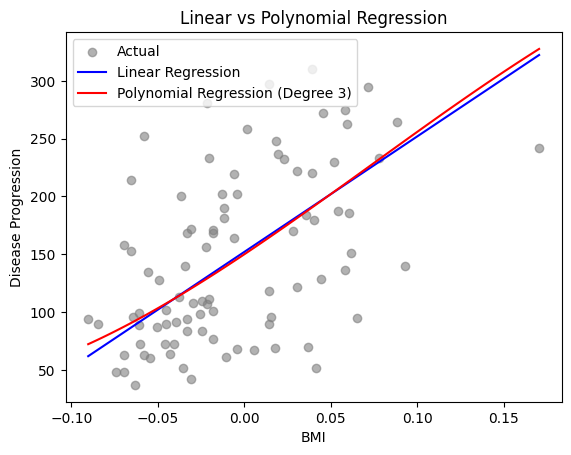

In [7]:
# Sort for plotting
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

# Predictions for plot
y_range_pred_linear = linear_model.predict(X_range)
y_range_pred_poly = poly_model.predict(X_range_poly)

# Plot
plt.scatter(X_test, y_test, color='gray', label='Actual', alpha=0.6)
plt.plot(X_range, y_range_pred_linear, label='Linear Regression', color='blue')
plt.plot(X_range, y_range_pred_poly, label=f'Polynomial Regression (Degree {degree})', color='red')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Linear vs Polynomial Regression')
plt.legend()
plt.show()


### Evaluation Metrics

In [8]:
# MSE comparison
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("Linear Regression MSE:", mse_linear)
print(f"Polynomial Regression (Degree {degree}) MSE:", mse_poly)


Linear Regression MSE: 4061.8259284949268
Polynomial Regression (Degree 3) MSE: 4064.4433837164365


# Polynomial Regression with Multiple Features

We extend Polynomial Regression to use **multiple features** from the dataset. This allows us to capture **nonlinear interactions** between variables.

We'll:

- Use all other features
- Fit a Polynomial Regression model (degree 2 or 3)
- Compare it with standard Linear Regression
- Evaluate performance using R² and MSE


In [11]:
# Select multiple features
X = df.drop(columns='target')
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Train linear regression as baseline
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, y_pred_linear))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))


Linear Regression R²: 0.4526027629719195
Linear Regression MSE: 2900.1936284934814


In [19]:
# Get feature names and coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': linear_model.coef_
})

# Display
print("Intercept:", linear_model.intercept_)
print("\nCoefficients:")
display(coef_df)

Intercept: 151.34560453985995

Coefficients:


,Feature,Coefficient
0,age,37.904021
1,sex,-241.964362
2,bmi,542.428759
3,bp,347.703844
4,s1,-931.488846
5,s2,518.062277
6,s3,163.419983
7,s4,275.317902
8,s5,736.198859
9,s6,48.670657


In [22]:
# Set degree
degree = 2

# Generate polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train model
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_poly_test)

print(f"Polynomial Regression (Degree {degree}) R²:", r2_score(y_test, y_pred_poly))
print(f"Polynomial Regression (Degree {degree}) MSE:", mean_squared_error(y_test, y_pred_poly))


Polynomial Regression (Degree 2) R²: 0.415639933640802
Polynomial Regression (Degree 2) MSE: 3096.028307344262


In [24]:
# Get polynomial feature names
poly_feature_names = poly.get_feature_names_out(X_train.columns)

# Create DataFrame of coefficients
poly_coef_df = pd.DataFrame({
    'Feature': poly_feature_names,
    'Coefficient': poly_model.coef_
})

# Display top influential terms
poly_coef_df['Abs_Coefficient'] = poly_coef_df['Coefficient'].abs()
poly_coef_df = poly_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Show
poly_coef_df[['Feature', 'Coefficient']].head(10)

,Feature,Coefficient
45,s1 s2,-128756.526561
44,s1^2,93389.151756
46,s1 s3,-61554.050838
50,s2^2,45682.471825
48,s1 s5,-40293.436034
51,s2 s3,34453.904406
62,s5^2,32935.160987
47,s1 s4,-25238.391169
53,s2 s5,23659.351007
38,bp s1,19931.747701


### From Linear to Polynomial: Feature Transformation

### Linear Features (Degree = 1)

Suppose you have input features:

    X = [x1, x2]

A linear regression model learns a function:

$$y=β_0+β_1x_1+β_2x_2$$

Only first-degree terms (no squares or interactions).

Polynomial Features (Degree = 2)

When you apply:

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

you get:

$$y=β_0​+β_1​x_1​+β_2​x_2​+β_3​x_1^2​+β_4​x_1​x_2​+β_5​x_2^2$$

So the new features become:

    X =[1, x1, x2, x1^2, x1·x2, x2²]

**Now model nonlinear relationships using only a linear model on transformed features.**

General Formula

For n input features and polynomial degree=d, the number of output features is:

New Features = $$\binom{n+d}{d}$$

If n = 4 and d = 2:

$\binom{4+2}{2} = \binom{6}{2}$ = 15

This includes:

    All combinations with repetition

    All powers up to degree



### Conclusion

- **Polynomial Regression** models nonlinear relationships by transforming features.
- With `degree=3`, the model fits the data better than simple Linear Regression in this case.
- However, higher-degree polynomials can lead to **overfitting**.

### Trade-off: Bias vs Variance

- Low-degree polynomial: high bias, underfits
- High-degree polynomial: high variance, overfits

Always use **cross-validation** and **visual inspection** to find the right balance.
